In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da1d49f96fef98b8dd04698790ab94dc


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | safaga
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...taolanaro
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | pijijiapan
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | koutiala
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | morristown
Processing Record 16 of Set 1 | dubai
Processing Record 17 of Set 1 | salisbury
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...belushya guba
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | thompson
Process

In [13]:
len(city_data)

560

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,-23.82,98,100,9.08,RU,2022-02-12 15:41:39
1,East London,-33.0153,27.9116,83.34,78,20,13.80,ZA,2022-02-12 15:39:40
2,Henties Bay,-22.1160,14.2845,74.39,78,8,6.11,NA,2022-02-12 15:41:34
3,Safaga,26.7292,33.9365,69.75,48,0,8.50,EG,2022-02-12 15:48:02
4,Georgetown,5.4112,100.3354,82.89,83,20,2.30,MY,2022-02-12 15:41:30
5,Pijijiapan,15.7011,-93.2300,90.82,36,0,4.74,MX,2022-02-12 15:48:04
6,Kudahuvadhoo,2.6708,72.8944,82.04,66,95,6.46,MV,2022-02-12 15:48:05
7,Taoudenni,22.6783,-3.9836,76.71,13,0,12.06,ML,2022-02-12 15:48:07
8,Jamestown,42.0970,-79.2353,29.52,51,100,12.66,US,2022-02-12 15:38:10
9,Vardo,70.3705,31.1107,16.00,71,37,13.38,NO,2022-02-12 15:44:33


In [15]:
new_column_order_df = city_data_df.reindex(columns= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
new_column_order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-02-12 15:41:39,68.7500,161.3000,-23.82,98,100,9.08
1,East London,ZA,2022-02-12 15:39:40,-33.0153,27.9116,83.34,78,20,13.80
2,Henties Bay,NA,2022-02-12 15:41:34,-22.1160,14.2845,74.39,78,8,6.11
3,Safaga,EG,2022-02-12 15:48:02,26.7292,33.9365,69.75,48,0,8.50
4,Georgetown,MY,2022-02-12 15:41:30,5.4112,100.3354,82.89,83,20,2.30
5,Pijijiapan,MX,2022-02-12 15:48:04,15.7011,-93.2300,90.82,36,0,4.74
6,Kudahuvadhoo,MV,2022-02-12 15:48:05,2.6708,72.8944,82.04,66,95,6.46
7,Taoudenni,ML,2022-02-12 15:48:07,22.6783,-3.9836,76.71,13,0,12.06
8,Jamestown,US,2022-02-12 15:38:10,42.0970,-79.2353,29.52,51,100,12.66
9,Vardo,NO,2022-02-12 15:44:33,70.3705,31.1107,16.00,71,37,13.38


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
new_column_order_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

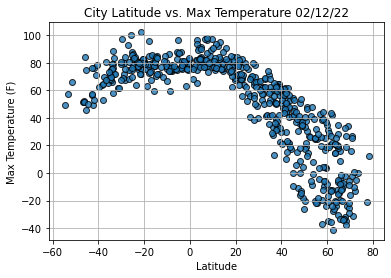

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()